In [3]:
# === Load dataset ===
import pandas as pd
import numpy as np

In [2]:
# === Load dataset ===
DATA_PATH = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'   # change ONLY if your file name differs

df = pd.read_csv(DATA_PATH)

print("Dataset Loaded Successfully!")
print("Shape of the dataset:", df.shape)



Dataset Loaded Successfully!
Shape of the dataset: (7043, 21)


In [4]:
print("Columns in the dataset:\n")
print(df.columns)

print("\n\nData types of each column:\n")
print(df.dtypes)


Columns in the dataset:

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Data types of each column:

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Chur

In [5]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# Convert TotalCharges to numeric (fixing empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many became NaN
df['TotalCharges'].isna().sum()


np.int64(11)

In [8]:
# Drop the NaN rows in TotalCharges
df = df.dropna(subset=['TotalCharges'])

print("Shape after dropping missing TotalCharges:", df.shape)


Shape after dropping missing TotalCharges: (7032, 21)


In [9]:
# Convert Churn "Yes"/"No" to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop the customerID column
df = df.drop('customerID', axis=1)

print("Unique values in Churn:", df['Churn'].unique())
print("\nShape after dropping customerID:", df.shape)


Unique values in Churn: [0 1]

Shape after dropping customerID: (7032, 20)


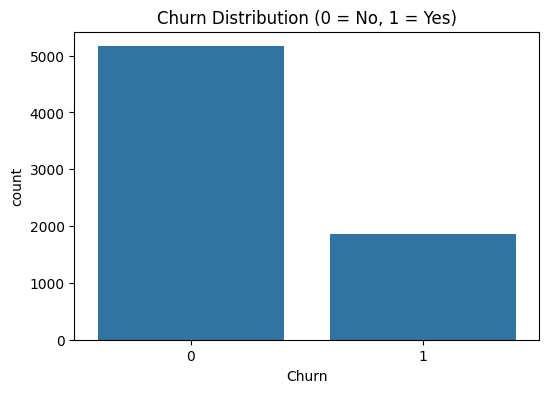

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

print(df['Churn'].value_counts(normalize=True))


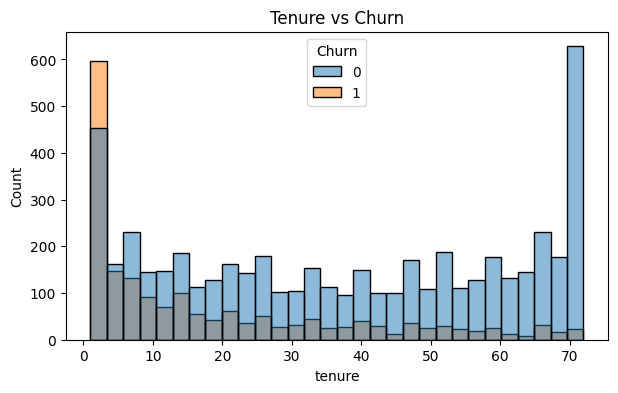

In [11]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=False)
plt.title("Tenure vs Churn")
plt.show()


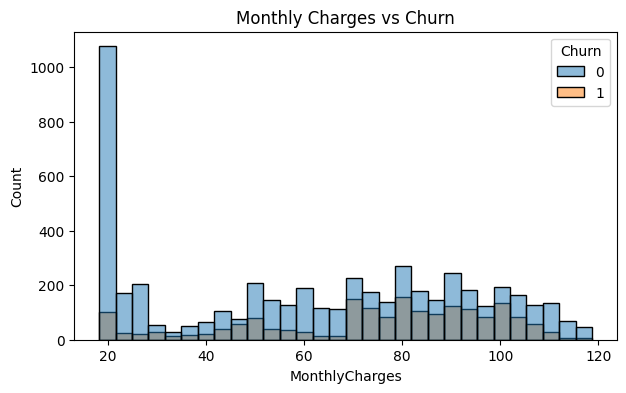

In [12]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30)
plt.title("Monthly Charges vs Churn")
plt.show()


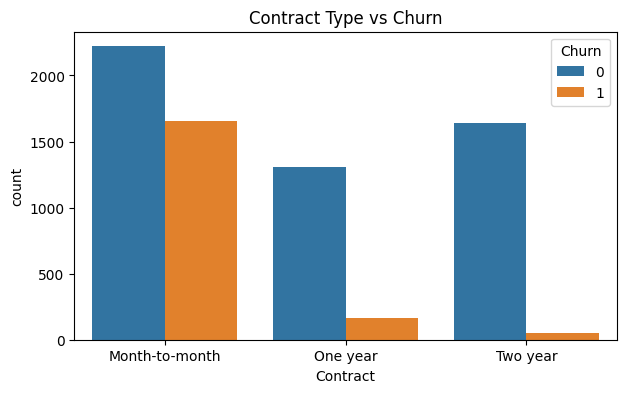

In [13]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Contract Type vs Churn")
plt.show()


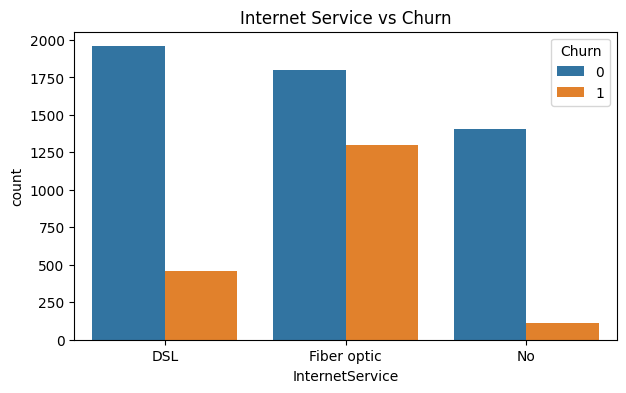

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Internet Service vs Churn")
plt.show()


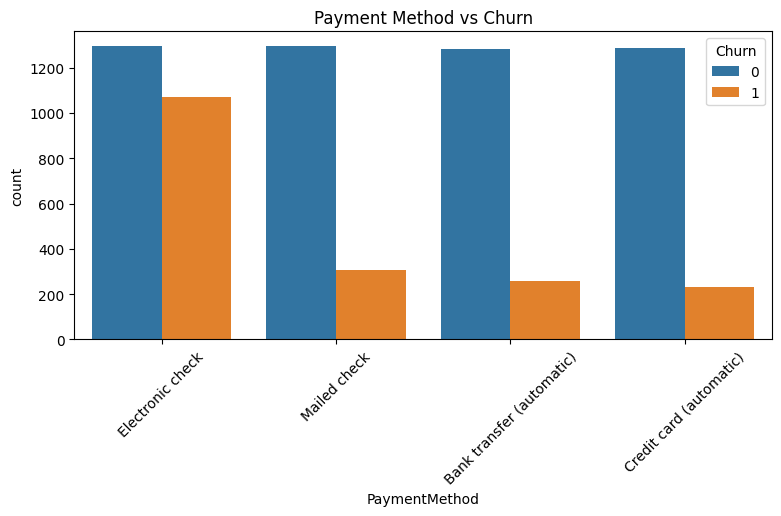

In [15]:
plt.figure(figsize=(9,4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()


In [16]:
# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

X.shape, y.shape


((7032, 19), (7032,))

In [17]:
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y         # keeps the churn ratio same in train and test
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5625, 19), (1407, 19), (5625,), (1407,))

In [18]:
# Identify numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_cols, categorical_cols


(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline   # <-- This was missing

# Numeric preprocessing: (impute missing values + scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing: (impute missing + One-Hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [22]:
# Combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create pipeline: preprocessing + model
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model_lr.fit(X_train, y_train)

# Predict
y_pred_lr = model_lr.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy: 0.8038379530916845

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [24]:
# CELL 18 — Random Forest baseline with class_weight='balanced'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Pipeline: reuse the same preprocessor
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

# Train
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:,1]

# Eval
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7839374555792467
ROC-AUC: 0.8120395918642033

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix:
 [[926 107]
 [197 177]]


In [25]:
!pip install xgboost -q
from xgboost import XGBClassifier

model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss'
    ))
])

# Train
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:,1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.7782515991471215
ROC-AUC: 0.8250009059330853

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix:
 [[898 135]
 [177 197]]


In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

thresholds = [0.5, 0.45, 0.40, 0.35, 0.30]

for t in thresholds:
    print(f"\n==== Threshold = {t} ====")
    y_pred_thresh = (y_proba_xgb >= t).astype(int)
    print("Classification Report:")
    print(classification_report(y_test, y_pred_thresh))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_thresh))



==== Threshold = 0.5 ====
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407

Confusion Matrix:
[[898 135]
 [177 197]]

==== Threshold = 0.45 ====
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.58      0.58      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.77      0.77      1407

Confusion Matrix:
[[873 160]
 [157 217]]

==== Threshold = 0.4 ====
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
    

In [27]:
import joblib

# Save the final preprocessor + XGBoost model
joblib.dump(model_xgb, "final_churn_model.pkl")

# Save the best threshold
best_threshold = 0.30
joblib.dump(best_threshold, "best_threshold.pkl")

print("Model and threshold saved successfully!")


Model and threshold saved successfully!


Using 45 features for SHAP.


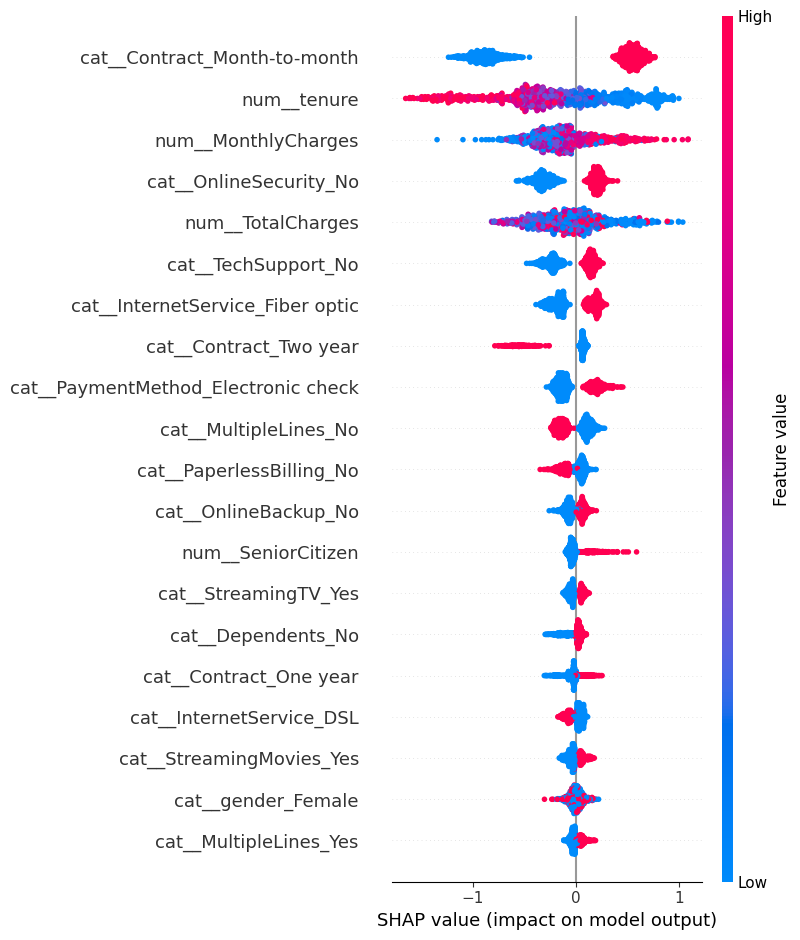

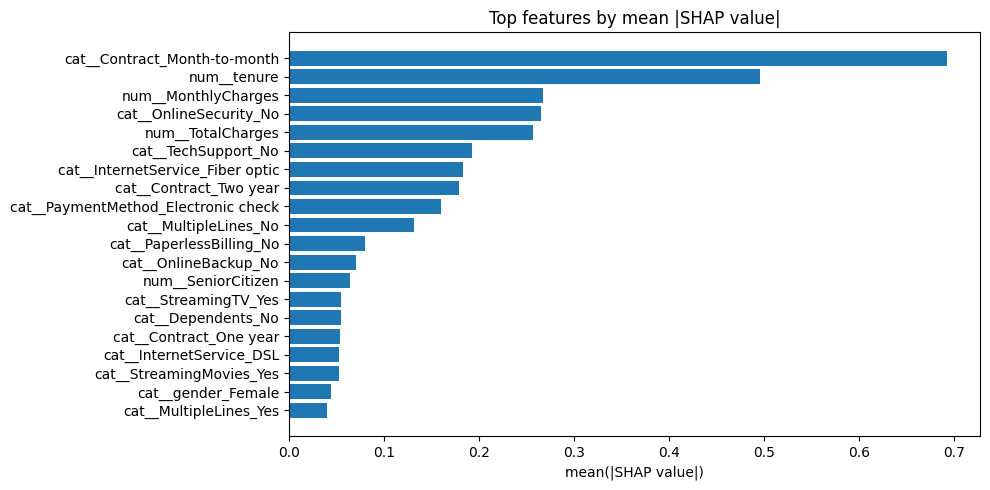

Dependence plot failed for cat__Contract_Month-to-month: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method
Dependence plot failed for num__tenure: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method
Dependence plot failed for num__MonthlyCharges: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method
Showing local explanation for test sample index (in subset): 99


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

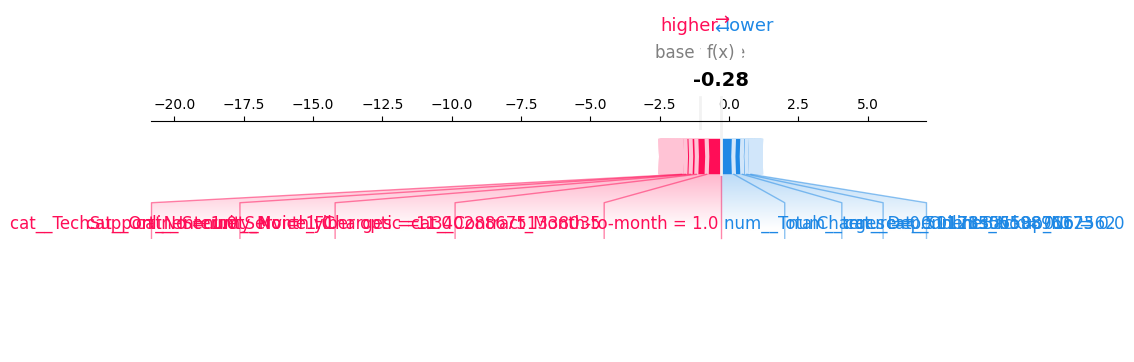

SHAP analysis complete. Inspect the summary + dependence + local plots above.


In [29]:
# CELL 22 — SHAP explainability (global + local)
# Run this cell (it may take a little time for SHAP to compute)
import joblib
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load model (pipeline with preprocessor + classifier) — we saved it earlier
model = joblib.load('/content/final_churn_model.pkl')

# Extract preprocessor and classifier
preprocessor = model.named_steps['preprocessor']
clf = model.named_steps['classifier']

# Prepare a preprocessed DataFrame for SHAP
# 1) Transform the test set using preprocessor
X_test_pre = preprocessor.transform(X_test)

# 2) Try to get feature names (works for sklearn >=1.0)
try:
    feature_names = preprocessor.get_feature_names_out()
    # make a DataFrame for nicer plotting
    X_test_df = pd.DataFrame(X_test_pre, columns=feature_names)
except Exception:
    # Fallback: create generic names
    X_test_df = pd.DataFrame(X_test_pre)
    feature_names = X_test_df.columns.tolist()

print("Using", X_test_df.shape[1], "features for SHAP.")

# Select a subset for SHAP speed if needed
subset_idx = np.random.choice(X_test_df.shape[0], size=min(1000, X_test_df.shape[0]), replace=False)
X_shap = X_test_df.iloc[subset_idx]

# Create SHAP explainer
# For tree models, TreeExplainer is fastest / most accurate
try:
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer(X_shap)
except Exception as e:
    # fallback to KernelExplainer if TreeExplainer fails (slower)
    print("TreeExplainer failed, falling back to KernelExplainer. Exception:", e)
    background = X_shap.sample(n=min(100, X_shap.shape[0]), random_state=42)
    explainer = shap.KernelExplainer(clf.predict_proba, background)
    shap_values = explainer.shap_values(X_shap)  # KernelExplainer returns list for multiclass

# ----- PLOTTING -----
# 1) Global feature importance (summary plot)
plt.figure(figsize=(10,6))
try:
    shap.summary_plot(shap_values, X_shap, show=True)
except Exception as e:
    # Older shap versions may require different call signature:
    try:
        shap.summary_plot(shap_values.values, X_shap, feature_names=feature_names)
    except Exception as e2:
        print("Could not show summary plot directly:", e, e2)

# 2) Bar plot of mean(|SHAP|)
plt.figure(figsize=(10,5))
try:
    # shap_values.data or shap_values.values depending on shap version
    mean_abs = np.abs(shap_values.values).mean(axis=0) if hasattr(shap_values, 'values') else np.abs(shap_values).mean(axis=0)
    idx = np.argsort(mean_abs)[-20:][::-1]  # top 20
    names = np.array(X_shap.columns)[idx]
    plt.barh(range(len(idx)), mean_abs[idx][::-1])
    plt.yticks(range(len(idx)), names[::-1])
    plt.title("Top features by mean |SHAP value|")
    plt.xlabel("mean(|SHAP value|)")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Bar plot failed:", e)

# 3) Dependence plot for the top 3 features (if exist)
top_feats = list(np.array(X_shap.columns)[idx[:3]]) if 'idx' in locals() else X_shap.columns[:3].tolist()
for f in top_feats:
    try:
        plt.figure(figsize=(6,4))
        shap.dependence_plot(f, shap_values, X_shap, show=True)
    except Exception as e:
        print(f"Dependence plot failed for {f}:", e)

# 4) Local explanation for a single sample (random)
sample_i = np.random.randint(0, X_shap.shape[0])
print("Showing local explanation for test sample index (in subset):", sample_i)
try:
    shap.force_plot(explainer.expected_value, shap_values.values[sample_i], X_shap.iloc[sample_i], matplotlib=True, figsize=(10,3))
except Exception as e:
    try:
        # alternative for newer shap: pass shap_values[sample_i]
        shap.force_plot(explainer.expected_value, shap_values[sample_i].values, X_shap.iloc[sample_i], matplotlib=True, figsize=(10,3))
    except Exception as e2:
        print("Force plot failed (this is fine in headless env). Exception:", e, e2)

print("SHAP analysis complete. Inspect the summary + dependence + local plots above.")
